### Time varying GSTC - 1D

### direct space

In [2]:
from IPython.display import display, Math
from sympy import latex

eq_1_ltx = r'\mathbf{n}\times\left(\mathbf{H}^{+}-\mathbf{H}^{-}\right)=\frac{\partial}{\partial t}\mathbf{P}_{t}'
eq_2_ltx = r'\mathbf{n}\times\left(\mathbf{E}^{+}-\mathbf{E}^{-}\right)=-\mu_{0}\frac{\partial}{\partial t}\mathbf{M}_{t}'
eq_3_ltx = r'\mathbf{P}_{t}\left(t\right)=\intop\mathbf{n}\times\left(\mathbf{H}^{+}-\mathbf{H^{-}}\right)dt=\varepsilon_{0}\mathbf{\boldsymbol{\chi}}_{ee}\left(t\right)\mathbf{\overline{\mathbf{E}}}\left(t\right)'
eq_4_ltx = r'\mathbf{M}_{t}\left(t\right)=-\frac{1}{\mu_{0}}\intop\mathbf{n}\times\left(\mathbf{E}^{+}-\mathbf{E^{-}}\right)dt=\mathbf{\boldsymbol{\chi}}_{mm}\left(t\right)\overline{\mathbf{H}}\left(t\right)'

display(Math(eq_1_ltx))
display(Math(eq_2_ltx))
display(Math(eq_3_ltx))
display(Math(eq_4_ltx))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### differential equation for polarization densities

In [10]:
from sympy import *
from Electromagnetics.VectorCalculus import *
from IPython.display import display, Math, Latex

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

t, x, y, z = symbols('t x y z')
Ei_x = Function('E^i_{x}')(t)
Er_x = Function('E^r_{x}')(t)
Et_x = Function('E^t_{x}')(t)

X_ee = Function('\\chi_{ee}')(t)
X_mm = Function('\\chi_{mm}')(t)


eps_0, mu_0, eta_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0')

Ei = Matrix([[Ei_x, 0, 0]])
Er = Matrix([[Er_x, 0, 0]])
Et = Matrix([[Et_x, 0, 0]])

a_z = Matrix([[0, 0, 1]])

Hi = crossproduct(a_z, Ei)/eta_0
Hr = crossproduct(-a_z, Er)/eta_0
Ht = crossproduct(a_z, Et)/eta_0

display(Math('E^i = ' + latex(Ei)))
display(Math('E^r = ' + latex(Er)))
display(Math('E^t = ' + latex(Et)))

display(Math('H^i = ' + latex(Hi)))
display(Math('H^r = ' + latex(Hr)))
display(Math('H^t = ' + latex(Ht)))

del_E = Et-Ei-Er
del_H = Ht-Hi-Hr
E_avg = (Ei+Er+Et)/2.0
H_avg = (Hi+Hr+Ht)/2.0

P = eps_0*X_ee*E_avg
M = X_mm*H_avg

display(Math('P = ' + latex(P.T)))
display(Math('M = ' + latex(M.T)))

P_x = Function('P_{x}')(t)
M_y = Function('M_{y}')(t)

eq_0 = P[0] - P_x
eq_1 = M[1] - M_y

display(Math('Eq_0 = ' + latex(eq_0)))
display(Math('Eq_1 = ' + latex(eq_1)))

Er_Et_sub = solve([eq_0, eq_1], [Er_x, Et_x])
Er_x_sub = Er_Et_sub[Er_x]
Et_x_sub = Er_Et_sub[Et_x]

display(Math('Er_x = ' + latex(Er_x_sub)))
display(Math('Et_x = ' + latex(Et_x_sub)))

P = Matrix([[P_x, 0, 0]])
M = Matrix([[0, M_y, 0]])
deq_0 = (crossproduct(a_z, del_H) - Misc.SymMatrixdiff(P, t))[0]
deq_1 = (crossproduct(a_z, del_E) + mu_0*Misc.SymMatrixdiff(M, t))[1]

display(Math('DEq_0 : ' + latex(deq_0)))
display(Math('DEq_1 : ' + latex(deq_1)))

deq_0 = deq_0.subs([(Er_x, Er_x_sub), (Et_x, Et_x_sub)]).simplify()
deq_1 = deq_1.subs([(Er_x, Er_x_sub), (Et_x, Et_x_sub)]).simplify()

display(Math('DEq_0 : ' + latex(deq_0)))
display(Math('DEq_1 : ' + latex(deq_1)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### calculating susceptibilities

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

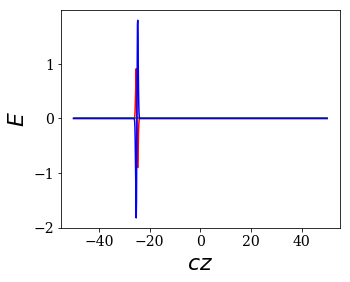

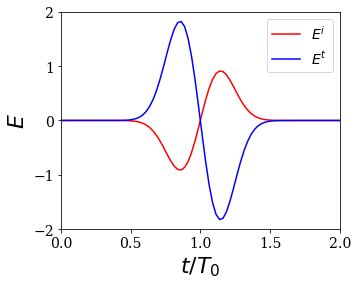

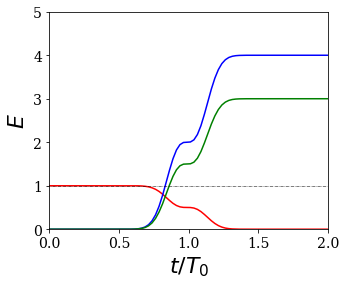

/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/GSTCTD.py:45: RuntimeWarning: divide by zero encountered in true_divide
  X_ee = (2.0*P_t)/(E_t(t, 0.0)+E_i(t, 0.0)+E_r(t, 0.0))/eps_0
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/GSTCTD.py:45: RuntimeWarning: overflow encountered in true_divide
  X_ee = (2.0*P_t)/(E_t(t, 0.0)+E_i(t, 0.0)+E_r(t, 0.0))/eps_0
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/GSTCTD.py:45: RuntimeWarning: invalid value encountered in true_divide
  X_ee = (2.0*P_t)/(E_t(t, 0.0)+E_i(t, 0.0)+E_r(t, 0.0))/eps_0
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/GSTCTD.py:46: RuntimeWarning: divide by zero encountered in true_divide
  X_mm = (2.0*eta_0*M_t)/(E_t(t, 0.0)+E_i(t, 0.0)-E_r(t, 0.0))
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/GSTCTD.py:46: RuntimeWarning: overflow encountered in true_divide
  X_mm = (2.0*eta_0*M_t)/(E_t(t, 0.0)+E_i(t, 0.0)-E_r(t, 0.0))
/home/nima/Documents/GitProjects/myPyC

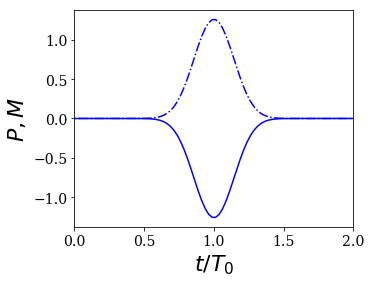

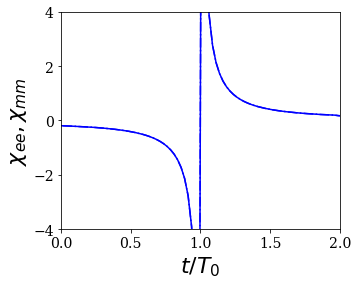

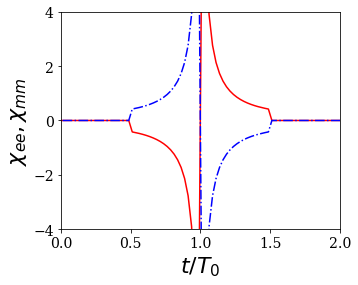

X_ee_max : 8.0
self.X_ee_intervals: [[23.973973973973976, 24.024024024024026], [25.975975975975977, 26.026026026026027]]
self.X_mm_intervals: [[23.973973973973976, 24.024024024024026], [25.975975975975977, 26.026026026026027]]
self.X_ee_roots :  []


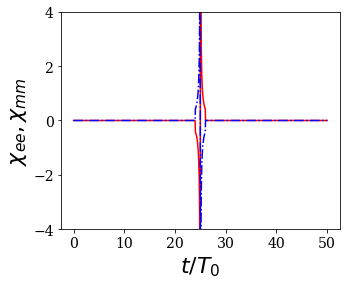

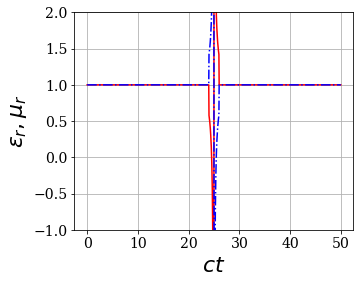

X_ee_roots: []
X_mm_roots: []
subintervals_ee: [24.0, 25.0, 26.0]
subinterval_zeros_ee: [24.0, 26.0]
subintervals_mm: [24.0, 25.0, 26.0]
subinterval_zeros_mm: [24.0, 26.0]
g[t_p]: -0.026030573308449947


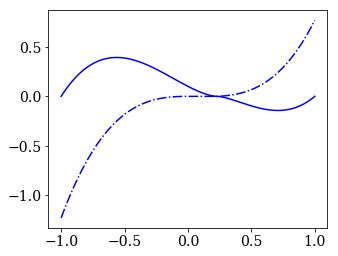

/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/GSTCTD.py:397: RuntimeWarning: divide by zero encountered in double_scalars
  theta[i] = np.abs(t[i]-t_p)**(a[i])/b
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/GSTCTD.py:513: RuntimeWarning: invalid value encountered in true_divide
  (t - t_p)*g/a*is_close_tp
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/GSTCTD.py:441: RuntimeWarning: invalid value encountered in true_divide
  f = (int_theta_g + c)/(theta)*np.logical_not(is_close_tp) + \
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/GSTCTD.py:442: RuntimeWarning: invalid value encountered in true_divide
  (t - t_p)*g/a*is_close_tp


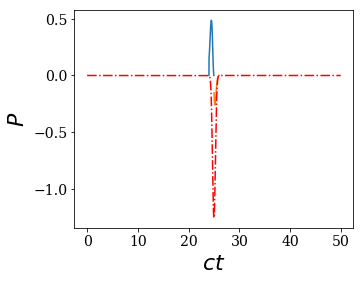

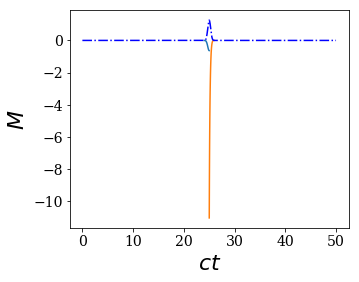

In [12]:
import numpy as np
from scipy.integrate import romb, quad
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib


from Electromagnetics.GSTCTD import GSTCTD1D
import sympy
from IPython.display import display, Math, Latex
from sympy import latex

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'gstc')
file_ext = '.eps'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)


ms = GSTCTD1D()

freq = 0.2*ms.c
omega = 2.0*np.pi*freq
eps_0 = ms.eps_0
mu_0 = ms.mu_0
eta_0 = ms.eta_0
c = ms.c
lamda = c/freq
k = omega/c

d = 10.0*lamda
z_0 = -d/2.0

n_pts = 1000
n_pts_t = 1000

A = 1.0
sigma = 3.0
wnd = [-z_0/c-3.0/sigma, -z_0/c+3.0/sigma]
t, z = sympy.symbols('t, z')
E_i, E_r, E_t = [None]*3

struc = 3
T_scale = 1.0

if struc==0:   ##absorber
    E_i = A*sympy.exp(-(t-(z-z_0)/c)**2*sigma**2)*sympy.sin(omega*(t-(z-z_0)/c))
    E_r = 0
    E_t = 0
elif struc==1:  ##derivative
    E_i = A*sympy.exp(-(t-(z-z_0)/c)**2*sigma**2)*sympy.cos(omega/2*(t-(z-z_0)/c))
    E_r = 0
    E_t = sympy.Derivative(E_i, t).doit()/2.0
elif struc==2:  ##time reversal
    E_i = A*sympy.exp(-(t-(z-z_0)/c)**2*sigma**2)*sympy.sin(omega*(t-(z-z_0)/c))
    E_r = 0
    E_t = -0.5*A*sympy.exp(-(t-(z-z_0)/c)**2*sigma**2)*sympy.sin(omega*(t-(z-z_0)/c))
elif struc==3:  ##time reversal 2
    E_i = A*(sympy.exp(-(t-(z-z_0+0.25)/c)**2*sigma**2) - sympy.exp(-(t-(z-z_0-0.25)/c)**2*sigma**2))
    E_r = 0
    E_t = -2.0*E_i
    T_scale = 2.0


display(Math('E_i : ' + latex(E_i)))
#print(latex(E_i))
display(Math('E_r : ' + latex(E_r)))
#print(latex(E_r))
display(Math('E_t : ' + latex(E_t)))
#print(latex(E_t))

ms.SetFieldsSympy(t, z, E_i, E_r, E_t)

t = np.linspace(0.0, d/c, n_pts_t)
z = np.linspace(-d, d, n_pts)


##animation
%matplotlib tk
_n_ = 5
plt.rcParams["figure.figsize"] = (4, 2)
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 8}
matplotlib.rc('font', **font)

save_anim = False
file_format = 'mp4'
fig, axarr = None, None
def animate_E(i):
    plt.clf()
    heaviside = lambda x: 0.5*(np.sign(x) + 1)
    E_tot = (ms.E_i(t[_n_*i], z) + ms.E_r(t[_n_*i], z))*heaviside(-z) + ms.E_t(t[_n_*i], z)*heaviside(z)
    fig = plt.plot(z, E_tot , 'b')
    ax = plt.gca()
    ax.set_ylim([-1.0, 1.0])
    #plt.xlabel(r'$cz$', fontsize=16)
    #plt.ylabel(r'$E$', fontsize=16)
    plt.axvline(0.0, color= 'r', linestyle='-.')
    return fig


fig = plt.figure()
anim = animation.FuncAnimation(fig, animate_E, frames=int(n_pts_t/_n_), interval=100)

if save_anim:
    if file_format=='gif':
        file_name = os.path.join(dir_name, 'E_tz.gif')
        anim.save(file_name, writer="imagemagick", fps=15, dpi=200)
    elif file_format=='mp4':
        file_name = os.path.join(dir_name, 'E_tz.mp4')
        anim.save(file_name, writer="ffmpeg", fps=15, dpi=200)

plt.show()


%matplotlib inline

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 14}
matplotlib.rc('font', **font)
fs_lable = 22
plt.rcParams["figure.figsize"] = (5, 4)

E_i_t0 = ms.E_i(0.0, z) 
E_r_t0 = ms.E_r(0.0, z)*np.ones(len(z))
E_t_t0 = ms.E_t(0.0, z)*np.ones(len(z))

plt.plot(z, E_i_t0, 'r')
plt.plot(z, E_r_t0, 'g')
plt.plot(z, E_t_t0, 'b')
plt.xlabel(r'$cz$', fontsize=fs_lable)
plt.ylabel(r'$E$', fontsize=fs_lable)
file_name = os.path.join(dir_name, 'fields_z_1d'+file_ext)
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.1)
plt.show()


E_i_z0 = ms.E_i(t, 0.0)  
E_r_z0 = ms.E_r(t, 0.0)*np.ones(len(t))
E_t_z0 = ms.E_t(t, 0.0)*np.ones(len(t))
t_shifted = (t+z_0/c)+2
plt.plot(t_shifted/T_scale, E_i_z0, 'r', label='$E^i$')
#plt.plot(t_shifted/T_scale, E_r_z0, 'g', label='$E^r$')
plt.plot(t_shifted/T_scale, E_t_z0, 'b', label='$E^t$')
plt.xlabel(r'$t/T_0$', fontsize=fs_lable)
plt.ylabel(r'$E$', fontsize=fs_lable)
plt.legend()
plt.xlim([0, 2])
plt.ylim([-2, 2])
file_name = os.path.join(dir_name, 'fields_t_1d'+file_ext)
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.1)
plt.show()

_nt = len(E_i_z0)
P_i_z0 = np.zeros(_nt)
P_t_z0 = np.zeros(_nt)
P_max = np.sum(E_i_z0**2)
P_i_z0[0] = E_i_z0[0]**2
P_t_z0[0] = E_t_z0[0]**2
for i in range(1, _nt):
    P_i_z0[i] = P_i_z0[i - 1] + E_i_z0[i]**2
    P_t_z0[i] = P_t_z0[i - 1] + E_t_z0[i]**2
P_i_z0 = P_max - P_i_z0
P_m_z0 = P_t_z0 + P_i_z0 - P_max
plt.plot(t_shifted/T_scale, P_i_z0/P_max, 'r', label='$P^i$')
plt.plot(t_shifted/T_scale, P_t_z0/P_max, 'b', label='$P^t$')
plt.plot(t_shifted/T_scale, P_m_z0/P_max, 'g', label='$P_M$')
plt.plot(t_shifted/T_scale, (P_i_z0+P_t_z0-P_m_z0)/P_max, 'k-.', linewidth=0.5)
plt.xlabel(r'$t/T_0$', fontsize=fs_lable)
plt.ylabel(r'$E$', fontsize=fs_lable)
#plt.legend()
plt.xlim([0, 2])
plt.ylim([0, 5])
file_name = os.path.join(dir_name, 'power_t_1d'+file_ext)
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.1)
plt.show()


ms.GetPMXeeXmm(t)

plt.plot(t_shifted/T_scale, ms.P_t, 'b')
plt.plot(t_shifted/T_scale, ms.M_t, 'b-.')
plt.xlabel(r'$t/T_0$', fontsize=fs_lable)
plt.ylabel(r'$P, M$', fontsize=fs_lable)
plt.xlim([0, 2])
file_name = os.path.join(dir_name, 'P_M_1d'+file_ext)
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.1)
plt.show()

plt.plot(t_shifted/T_scale, ms.X_ee, 'b')
plt.plot(t_shifted/T_scale, -ms.X_mm, 'b-.')
plt.gca().set_ylim([-4.0, 4.0])
plt.xlabel(r'$t/T_0$', fontsize=fs_lable)
plt.ylabel(r'$\chi_{ee}, \chi_{mm}$', fontsize=fs_lable)
plt.xlim([0, 2])
file_name = os.path.join(dir_name, 'X_ee_mm_1d'+file_ext)
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.1)
plt.show()

ms.ClipSusceptibilities(X_ee_max=8.0, X_mm_max=8.0)
ms.TimeWindowSusceptibilities(wnd, wnd)


plt.plot(t_shifted/T_scale, ms.X_ee, 'r')
plt.plot(t_shifted/T_scale, ms.X_mm, 'b-.')
plt.xlabel(r'$t/T_0$', fontsize=fs_lable)
plt.ylabel(r'$\chi_{ee}, \chi_{mm}$', fontsize=fs_lable)
plt.xlim([0, 2])
plt.gca().set_ylim([-4.0, 4.0])
plt.show()

ms.FindSusceptZeros()
ms.AdjustWindowToZeros()
    
plt.plot(t, ms.X_ee, 'r')
plt.plot(t, ms.X_mm, 'b-.')
plt.gca().set_ylim([-4.0, 4.0])
plt.xlabel(r'$t/T_0$', fontsize=fs_lable)
plt.ylabel(r'$\chi_{ee}, \chi_{mm}$', fontsize=fs_lable)
file_name = os.path.join(dir_name, 'X_ee_mm_wnd_1d'+file_ext)
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.1)
plt.show()


plt.plot(t, 1.0+ms.X_ee, 'r')
plt.plot(t, 1.0+ms.X_mm, 'b-.')
plt.gca().set_ylim([-1.0, 2.0])
plt.xlabel(r'$ct$', fontsize=fs_lable)
plt.ylabel(r'$\epsilon_{r}, \mu_{r}$', fontsize=fs_lable)
plt.grid()
file_name = os.path.join(dir_name, 'eps_mu_wnd_1d'+file_ext)
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.1)
plt.show()

print('X_ee_roots:', ms.X_ee_roots)
print('X_mm_roots:', ms.X_mm_roots)

ms.GetSubintervalsWithSingleZero()
print('subintervals_ee:', ms.subintervals_ee)
print('subinterval_zeros_ee:', ms.subinterval_zeros_ee)
print('subintervals_mm:', ms.subintervals_mm)
print('subinterval_zeros_mm:', ms.subinterval_zeros_mm)


N = 1000
t_p = 0.23
t = np.linspace(-1.0, 1.0, N)
f__ = (t-t_p)*t**2
f_0 = f__[0]
a = -1.5*np.cos(t/4.0)
g = (t**2+2.0*t*(t-t_p))+a*f__/(t-t_p)

print('g[t_p]:', g[np.argmax(t>t_p)])

f = ms.SolvePde1D(t, a, g, t_p, f_0)

plt.plot(t, f, 'b')
plt.plot(t, f__, 'b-.')
#plt.plot(t, g, 'g')
plt.show()


t_P_list = ms.SolveP(dt_min=0.01)

for i in range(len(t_P_list)):
    t, P = t_P_list[i]
    #P = P*(np.abs(P)<0.5)
    #print('P:', P)
    plt.plot(t, P)

plt.plot(ms.t, ms.P_t, 'r-.')
plt.xlabel(r'$ct$', fontsize=fs_lable)
plt.ylabel(r'$P$', fontsize=fs_lable)
file_name = os.path.join(dir_name, 'P_res'+file_ext)
plt.savefig(file_name)
plt.show()

t_M_list = ms.SolveM(dt_min=0.01)

for i in range(len(t_M_list)):
    t, M = t_M_list[i]
    #M = M*(np.abs(M)<1.5)
    #print('M:', M)
    plt.plot(t, M)

plt.plot(ms.t, ms.M_t, 'b-.')
plt.xlabel(r'$ct$', fontsize=fs_lable)
plt.ylabel(r'$M$', fontsize=fs_lable)
file_name = os.path.join(dir_name, 'M_res'+file_ext)
plt.savefig(file_name)
plt.show()
    

In [ ]:
## space-time graph